<a href="https://colab.research.google.com/github/JangAyeon/python_machine_learning/blob/main/%5B2_5%5D%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%A0%84%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#데이터 전처리<BR>



*   데이터 클린징
*   결손값 처리 (Null/NaN 처리)
*   데이터 인코딩 (레이블, 원-핫 인코딩)
*   데이터 스케일링
*   이상치 제거
*   feature 선택, 추출 및 가공



**데이터 인코딩**<br>

문자열 데이터 속성 입력 x<br>
모든 데이터는 숫자형으로 표시




> 레이블 인코딩<br>
ex)  [TV, 냉장고, 전자레인지, 컴퓨터, 선풍기, 믹서] -> [0,1,4,5,3,2]



In [9]:
from sklearn.preprocessing import LabelEncoder

items=['TV','냉장고','전자렌지','컴푸터','선풍기','선풍기','믹서','믹서']

encoder=LabelEncoder() #LabelEncoder를 객체로 생성
encoder.fit(items)
labels=encoder.transform(items) #fit()과 transform()로 label 인코딩 수행

print("인코딩 변환값 : ",labels)


인코딩 변환값 :  [0 1 4 5 3 3 2 2]


In [10]:
print("인코딩 클래스: ",encoder.classes_)

인코딩 클래스:  ['TV' '냉장고' '믹서' '선풍기' '전자렌지' '컴푸터']


In [11]:
print("디코딩 원본 값: ",encoder.inverse_transform([4,5,2,0,1,1,3,3]))

디코딩 원본 값:  ['전자렌지' '컴푸터' '믹서' 'TV' '냉장고' '냉장고' '선풍기' '선풍기']




> 원-핫 인코딩<br>



*   피처 값의 유형에 따라 새로운 피처 추가해 고유 값에 해당하는 column에만 1 부여
*   pd.get_dummies(DataFrame)




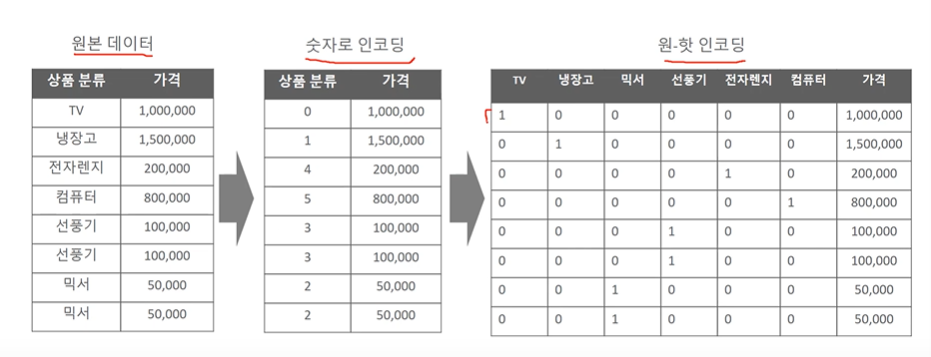

In [12]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items=['Tv','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']

#LabelEncoder 이용 : 숫자값으로 변환
encoder=LabelEncoder()
encoder.fit(items)
labels=encoder.transform(items)

#2차원 data로 변환 : column은 무조건 1개이지만 row는 -1로 동적으로 알아서 할당
labels=labels.reshape(-1,1)

#원-핫 인코딩 적용
oh_encoder=OneHotEncoder()
oh_encoder.fit(labels)
oh_labels=oh_encoder.transform(labels)

print("원-핫 인코딩 데이터")
print(oh_labels.toarray())
print("원-핫 인코딩 데이터 차원")
print(oh_labels.shape)

원-핫 인코딩 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
원-핫 인코딩 데이터 차원
(8, 6)


In [13]:
import pandas as pd #pandas에서 get_dummies를 이용해서 원-핫 인코딩

df=pd.DataFrame({'item':['Tv','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']})

df

,item
0,Tv
1,냉장고
2,전자레인지
3,컴퓨터
4,선풍기
5,선풍기
6,믹서
7,믹서


In [14]:
pd.get_dummies(df) #고유값 label별로 column이 생성됨

,item_Tv,item_냉장고,item_믹서,item_선풍기,item_전자레인지,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0




> 피쳐 스케일링


*   표준화<br>
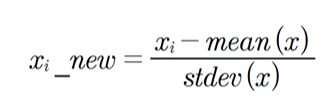
<br>-> StandardScaler : 평균 0, 분산 1인 정규 분포 형태로 변환
*   정규화<br>
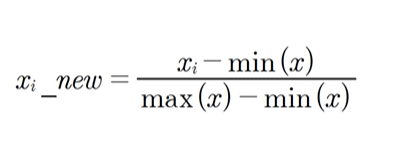
<br>-> MinMaxScaler : 데이터를 0~1 사이 범위 값으로 변환 (음수 값 존재시 -1을 1로)





In [16]:
#원래 dataset의 평균값과 분포
from sklearn.datasets import load_iris
import pandas as pd

iris=load_iris() #data set을 ㄹload
iris_data=iris.data
iris_df=pd.DataFrame(data=iris_data,columns=iris.feature_names) #DataFrame으로 변환

print("feature들의 평균값: ")
print(iris_df.mean())
print("\nfeature들의 분산값: ")
print(iris_df.var())

feature들의 평균값: 
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature들의 분산값: 
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [17]:
#StandardScaler
from sklearn.preprocessing import StandardScaler

#standardscaler 객체 생성
scaler=StandardScaler()
scaler.fit(iris_df) #fit과 transform 호출해 scale된 값 반환
iris_scaled=scaler.transform(iris_df)

#Ndarray형태로 반환된 것을 DataFrame으로 바꿔 보기 좋게~!
iris_df_scaled=pd.DataFrame(data=iris_scaled,columns=iris.feature_names)
print("feature들의 평균 값")
print(iris_df_scaled.mean())
print("\nfeature들의 분산 값")
print(iris_df_scaled.var())

feature들의 평균 값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature들의 분산 값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


In [19]:
#MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler() #MinMaxScaler 객체 생성

# MinMaxScaler 로 데이터 셋 변환. fit() 과 transform() 호출
scaler.fit(iris_df)
iris_scaled=scaler.transform(iris_df) #

#Ndarray형태로 반환된 것을 DataFrame으로 바꿔 보기 좋게~!
iris_df_scaled=pd.DataFrame(data=iris_scaled,columns=iris.feature_names)
print("feature들의 최소 값: ")
print(iris_df_scaled.min())
print("\nfeature들의 최대 값: ")
print(iris_df_scaled.max())

feature들의 최소 값: 
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

feature들의 최대 값: 
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64
